In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

### Prepare Training Data

In [2]:
dataset_train = pd.read_csv('data/Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
training_set = dataset_train[['Open']].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
# Feature Scaling
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [5]:
# Create a data structure with `TIMESTEPS` time steps and 1 output
# For example:
# input = values 0 to 59
# output = value at 60


TIMESTEPS = 60

X_train = []
y_train = []
for i in range(TIMESTEPS, len(training_set)):
    X_train.append(training_set_scaled[i-TIMESTEPS:i, 0])
    y_train.append(training_set_scaled[i, 0])

# Reshape data
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.expand_dims(X_train, axis=2)
X_train.shape

(1198, 60, 1)

## Create Model

In [6]:
# Initialize the RNN
network = Sequential()

# Add the first LSTM layer and some Dropout regularilzation
# LSTM: units - defines the no of units GOING OUT of this layer
#       return_sequences - keep output as a sequence
network.add( LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)) )
network.add( Dropout(0.2) )

# Add a second LSTM layer and some Dropout regularlization
network.add( LSTM(units=100, return_sequences=True) )
network.add( Dropout(0.2) )

# Add a third LSTM layer and some Dropout regularlization
network.add( LSTM(units=100, return_sequences=True) )
network.add( Dropout(0.2) )

# Add a forth LSTM layer and some Dropout regularlization
network.add( LSTM(units=100) )
network.add( Dropout(0.2) )

# Add output layer
network.add(Dense(units=1))

In [7]:
# Compile the model
network.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Show network summary
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               8

## Train

In [9]:
EPOCHS = 100
BATCH_SIZE = 32

history = network.fit(
    X_train, 
    y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE
)

Epoch 1/100
38/38 [==============================] - 5s 13ms/step - loss: 0.0426
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0040
Epoch 3/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 4/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0039
Epoch 5/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0034
Epoch 6/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0036
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0036
Epoch 8/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0036
Epoch 9/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0034
Epoch 10/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0035
Epoch 11/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0032
Epoch 13/100
38/38 [=====

38/38 [==============================] - 0s 12ms/step - loss: 0.0010


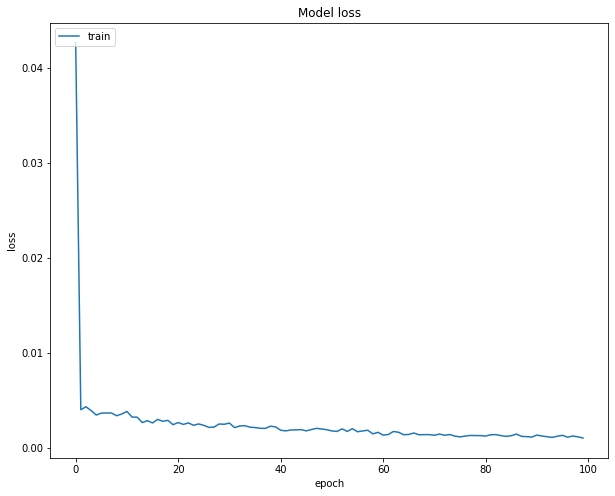

In [10]:
# Plot Training Stats

plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plt.figure(figsize=(10,8))
# plt.plot(history.history['mse'])
# # plt.plot(history.history['val_mse'])
# plt.title('Model accuracy')
# plt.ylabel('MSE')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

## Test

In [11]:
# Load Data
dataset_test = pd.read_csv('data/Google_Stock_Price_Test.csv')
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [12]:
real_stock_price = dataset_test[['Open']].values
real_stock_price.shape

(20, 1)

In [13]:
# Concatenating train & test data to check predictions on both the sets
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

# Take last 185 data points
inputs = dataset_total[len(dataset_total)-len(dataset_test)-TIMESTEPS:].values

inputs = np.expand_dims(inputs, axis=1)
inputs = sc.transform(inputs)


X_test = []
for i in range(TIMESTEPS, TIMESTEPS+len(dataset_test)):
    X_test.append(inputs[i-TIMESTEPS:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_test.shape

(20, 60, 1)

In [14]:
# Predict
predicted_stock_price = network.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

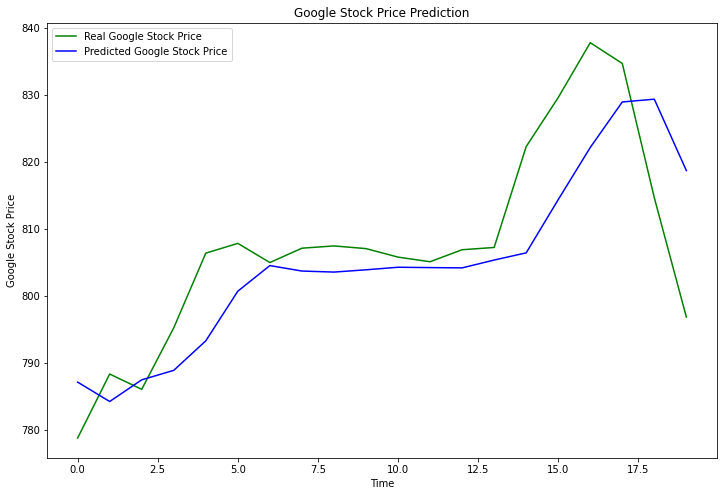

In [15]:
# Visualize
plt.figure(figsize=(12,8))
plt.plot(real_stock_price, color='green', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()